In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Case 1 -Binary class Classification

In [2]:

df = pd.read_csv(r'C:\Users\Hp\Desktop\data_science_full_course\machine_learning\titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [5]:

df = df.drop(labels=['PassengerId','Name','Ticket','Fare','Cabin'],axis =1)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [7]:
df.isnull().sum()/len(df)*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Embarked     0.224467
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [9]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
df['Age'].median()

28.0

<Axes: ylabel='Age'>

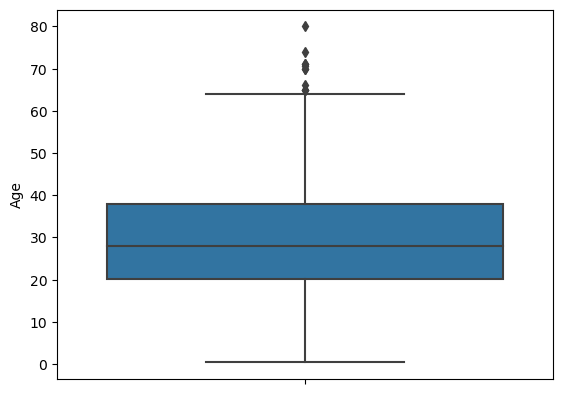

In [11]:
sns.boxplot(y='Age',data=df)

In [12]:
df['Age'] =df['Age'].fillna(df['Age'].mean())

In [13]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
df['Embarked']= df['Embarked'].fillna('S')

In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [16]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes

In [18]:
df = pd.get_dummies(df ,columns=['Embarked'])

In [19]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [20]:
df=pd.get_dummies(df,columns=['Pclass'])

In [21]:
df

,Survived,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.000000,1,0,0,0,1,0,0,1
1,1,0,38.000000,1,0,1,0,0,1,0,0
2,1,0,26.000000,0,0,0,0,1,0,0,1
3,1,0,35.000000,1,0,0,0,1,1,0,0
4,0,1,35.000000,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.000000,0,0,0,0,1,0,1,0
887,1,0,19.000000,0,0,0,0,1,1,0,0
888,0,0,29.699118,1,2,0,0,1,0,0,1
889,1,1,26.000000,0,0,1,0,0,1,0,0


In [22]:
df = df.drop(labels=['Embarked_C','Pclass_1'],axis=1)

In [23]:
df

,Survived,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,1,22.000000,1,0,0,1,0,1
1,1,0,38.000000,1,0,0,0,0,0
2,1,0,26.000000,0,0,0,1,0,1
3,1,0,35.000000,1,0,0,1,0,0
4,0,1,35.000000,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,1,27.000000,0,0,0,1,1,0
887,1,0,19.000000,0,0,0,1,0,0
888,0,0,29.699118,1,2,0,1,0,1
889,1,1,26.000000,0,0,0,0,0,0


In [24]:
#Outlier not req in this case

In [25]:
#Mandatory in classification problem -Imbalance check
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [26]:
#plit the data into dep and ind variable
x =df.iloc[:,1:]
y= df[['Survived']]

In [27]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [28]:
#splt data in test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=101,stratify=y)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred_log_test = lr.predict(x_test)
y_pred_log_train = lr.predict(x_train)

In [43]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [34]:
print("Accuracy Score:",accuracy_score(y_train,y_pred_log_train))

Accuracy Score: 0.8132022471910112


In [35]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_log_test))

Accuracy Score: 0.7597765363128491


In [38]:
pip install mlxtend


  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 1.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 1.4 MB/s eta 0:00:01
   --- ------------------------------------ 0.1/1.4 MB 1.4 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.4 MB 697.2 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 901.1 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 901.1 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 759.5 kB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.4 MB 942.8 kB/s eta 0:00:02
   ------------ ---------------------------

In [46]:
print("classification_report:",classification_report(y_train,y_pred_log_train))
print("classification_report:",classification_report(y_test,y_pred_log_test))

classification_report:               precision    recall  f1-score   support

           0       0.84      0.87      0.85       439
           1       0.77      0.73      0.75       273

    accuracy                           0.81       712
   macro avg       0.80      0.80      0.80       712
weighted avg       0.81      0.81      0.81       712

classification_report:               precision    recall  f1-score   support

           0       0.76      0.90      0.82       110
           1       0.77      0.54      0.63        69

    accuracy                           0.76       179
   macro avg       0.76      0.72      0.73       179
weighted avg       0.76      0.76      0.75       179



In [47]:
print("confusion_matrix:",confusion_matrix(y_train,y_pred_log_train))
print("confusion_matrix:",confusion_matrix(y_test,y_pred_log_test))

confusion_matrix: [[381  58]
 [ 75 198]]
confusion_matrix: [[99 11]
 [32 37]]


# Case-2 Multiclass Classification problem(One Vs Rest/ One Vs All)

In [49]:
iris = sns.load_dataset('iris')

In [51]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le=LabelEncoder()
iris['species'] = le.fit_transform(iris['species'])

In [57]:
iris['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [59]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [60]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [61]:
#split data into dependent and independent data

x= iris.iloc[:,0:-1]
y = iris[['species']]

In [62]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

In [70]:
#Building logistic regression
from sklearn.linear_model import LogisticRegression

In [71]:
logr=LogisticRegression(multi_class='ovr')

In [72]:
logr.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [76]:
y_pred_test = logr.predict(x_test)

In [77]:
y_pred_train = logr.predict(x_train)

In [79]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.9583333333333334
0.8666666666666667


In [81]:
print(confusion_matrix(y_train,y_pred_train))
print(confusion_matrix(y_test,y_pred_test))

[[39  0  0]
 [ 0 33  4]
 [ 0  1 43]]
[[11  0  0]
 [ 0  9  4]
 [ 0  0  6]]


In [82]:
print("classification_report:",classification_report(y_train,y_pred_train))
print("classification_report:",classification_report(y_test,y_pred_test))

classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.97      0.89      0.93        37
           2       0.91      0.98      0.95        44

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.69      0.82        13
           2       0.60      1.00      0.75         6

    accuracy                           0.87        30
   macro avg       0.87      0.90      0.86        30
weighted avg       0.92      0.87      0.87        30



In [100]:
x = iris.iloc[:,0:-1]
y = iris.iloc[:,-1]

In [101]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with a strategy (e.g., mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your data and transform it
x= imputer.fit_transform(x)

In [106]:
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.